In [168]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import re
import csv
from textblob import TextBlob
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS
#import plotly.offline as py
#py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

df = pd.read_csv('tweets.csv',encoding= "ISO-8859–1")
df.head(10)

,tweet_id,airline,name,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,5.703061e+17,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,5.703011e+17,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,5.703011e+17,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,5.703010e+17,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,5.703008e+17,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
5,5.703008e+17,Virgin America,jnardino,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada)
6,5.703006e+17,Virgin America,cjmcginnis,0,"@VirginAmerica yes, nearly every time I fly VX...",NaN,2015-02-24 11:13:57 -0800,San Francisco CA,Pacific Time (US & Canada)
7,5.703002e+17,Virgin America,pilot,0,@VirginAmerica Really missed a prime opportuni...,NaN,2015-02-24 11:12:29 -0800,Los Angeles,Pacific Time (US & Canada)
8,5.703000e+17,Virgin America,dhepburn,0,"@virginamerica Well, I didn'tâ¦but NOW I DO! :-D",NaN,2015-02-24 11:11:19 -0800,San Diego,Pacific Time (US & Canada)
9,5.702955e+17,Virgin America,YupitsTate,0,"@VirginAmerica it was amazing, and arrived an ...",NaN,2015-02-24 10:53:27 -0800,Los Angeles,Eastern Time (US & Canada)


In [142]:
df.columns

Index(['tweet_id', 'airline', 'name', 'retweet_count', 'text', 'tweet_coord',
       'tweet_created', 'tweet_location', 'user_timezone'],
      dtype='object')

In [143]:
df.isnull().sum()

tweet_id              0
airline               0
name                  0
retweet_count         0
text                  0
tweet_coord       13621
tweet_created         0
tweet_location     4733
user_timezone      4820
dtype: int64

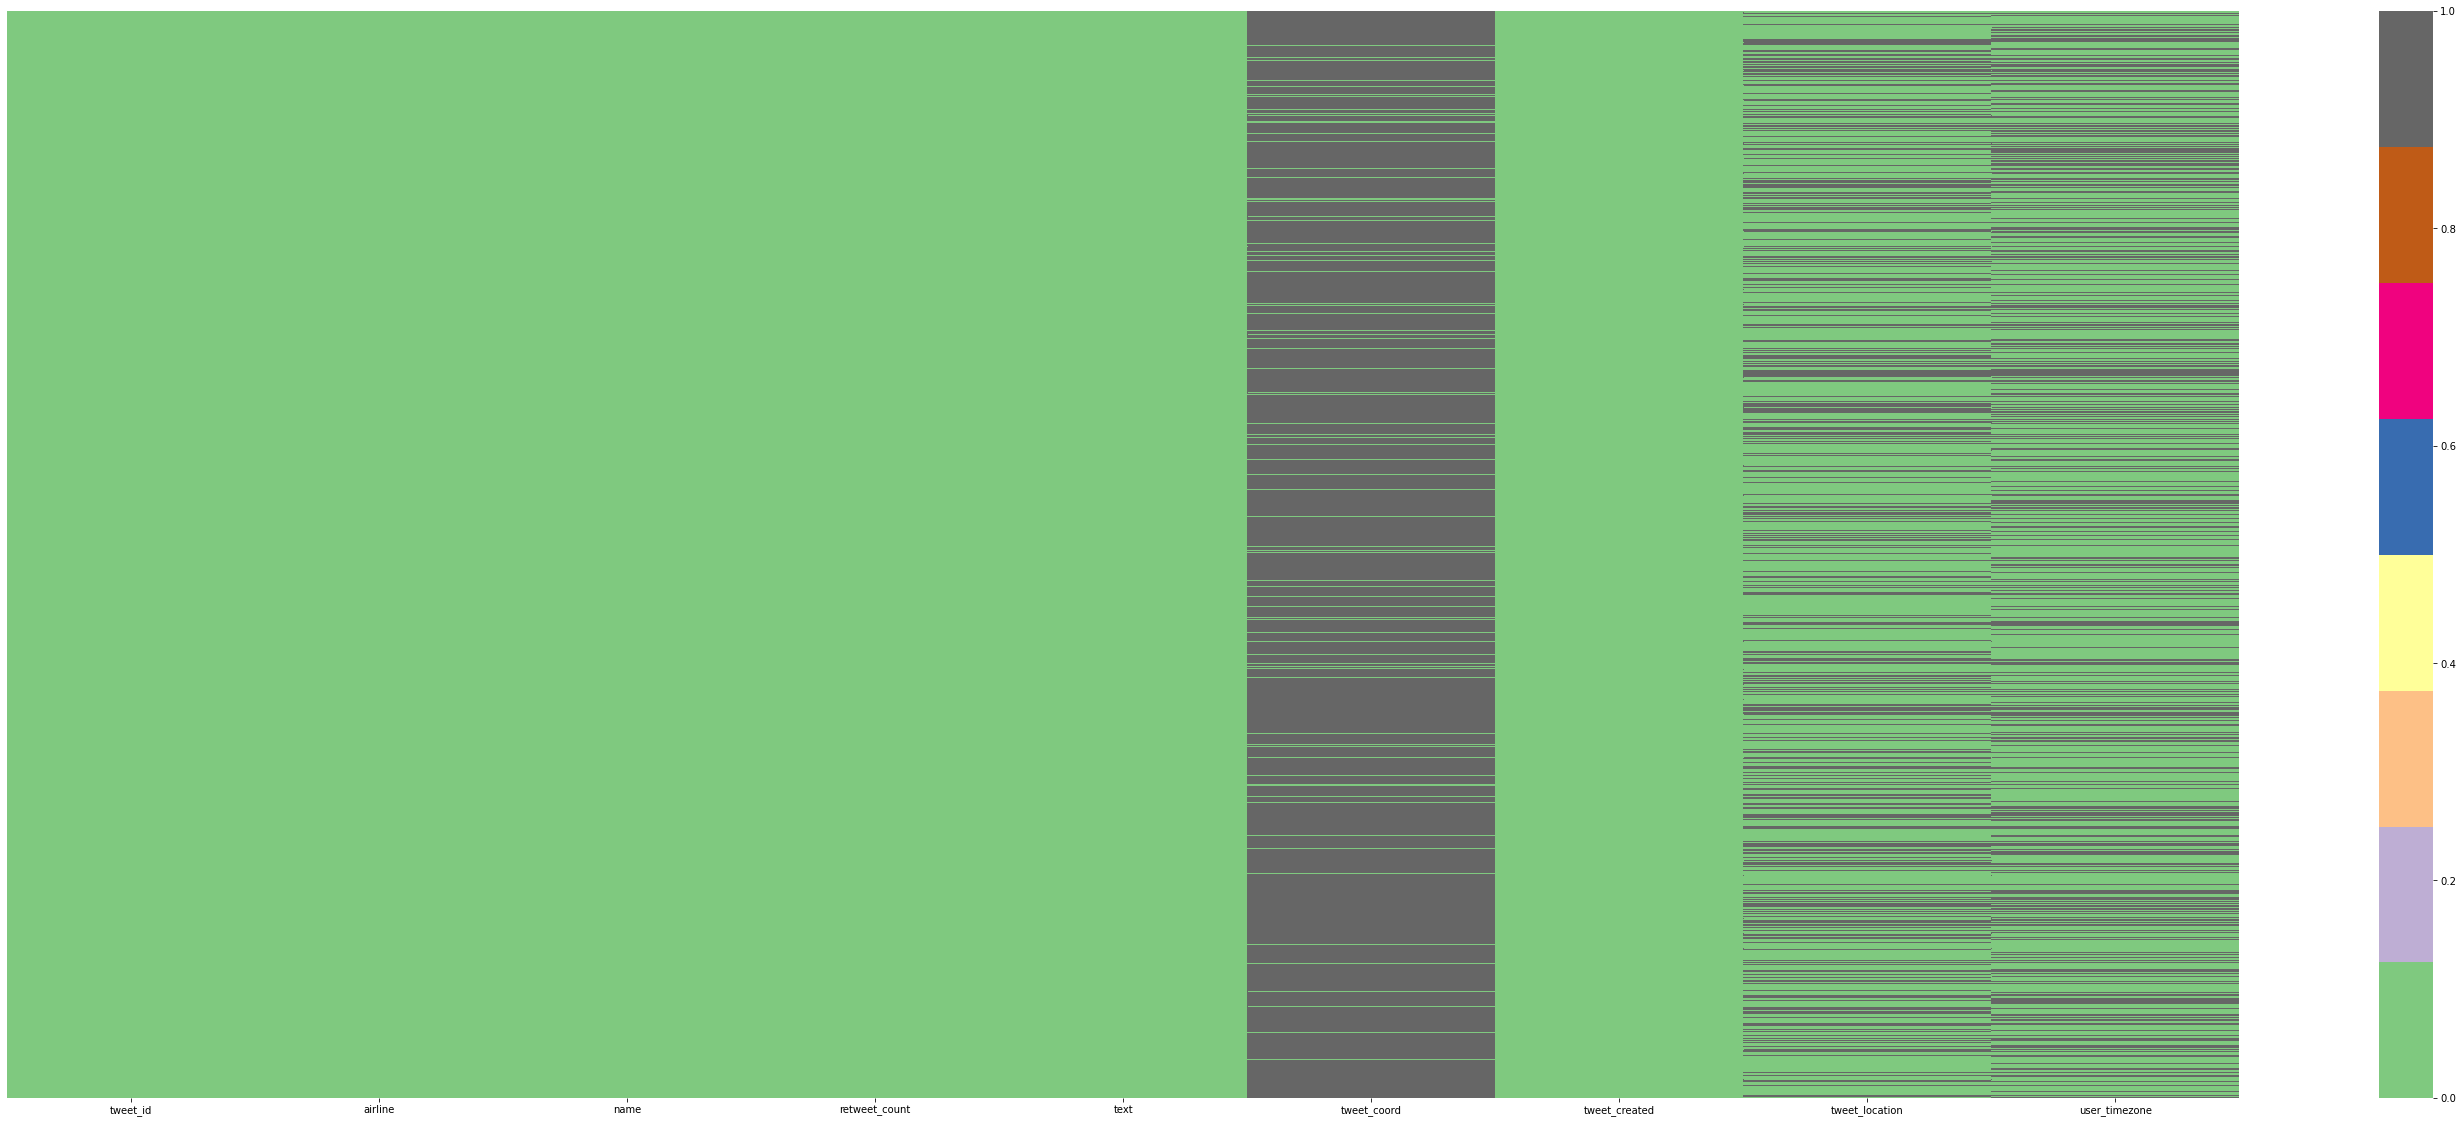

In [144]:
plt.figure(figsize=(50,20))
sns.heatmap(df.isnull(), yticklabels=False, cmap= 'Accent')
plt.show()


In [145]:
df.airline.value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

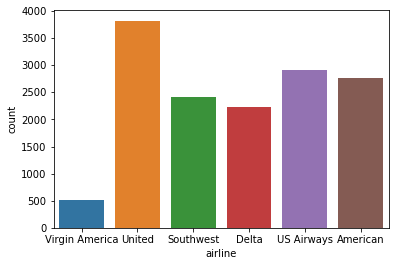

In [146]:
sns.countplot(df.airline)

## Sentiment Analysis

In [147]:
df.text[279]
from bs4 import BeautifulSoup
example1 = BeautifulSoup(df.text[279], 'lxml')
print(example1.get_text())

@VirginAmerica what is your policy on flying after surgery?  I am still waiting for answer so I can tell me doctor.


In [148]:
re.sub(r'@[A-Za-z0-9]+','',df.text[279])

' what is your policy on flying after surgery?  I am still waiting for answer so I can tell me doctor.'

In [149]:
from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()
pat1 = r'@[A-Za-z0-9]+'
pat2 = r'https?://[A-Za-z0-9./]+'
combined_pat = r'|'.join((pat1, pat2))
def tweet_cleaner(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    stripped = re.sub(combined_pat, '', souped)
    try:
        clean = stripped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        clean = stripped
    letters_only = re.sub("[^a-zA-Z]", " ", clean)
    lower_case = letters_only.lower()
    # During the letters_only process two lines above, it has created unnecessay white spaces,
    # I will tokenize and join together to remove unneccessary white spaces
    words = tok.tokenize(lower_case)
    return (" ".join(words)).strip()
testing = df.text[:100]
test_result = []
for t in testing:
    test_result.append(tweet_cleaner(t))
test_result

nums = [0,14640]
print ("Cleaning and parsing the tweets...\n")
clean_tweet_texts = []
for i in range(nums[0],nums[1]):
    #print ("Tweets %d of %d has been processed" % ( i+1, nums[1] ) )  
   
        clean_tweet_texts.append(tweet_cleaner(df['text'][i]))
    

#For the rest, you get the idea, I divided the whole dataset into four batches.Saving cleaned data as csv
clean_df = pd.DataFrame(clean_tweet_texts,columns=['text'])
clean_df['airline'] = df.airline
clean_df.head()

clean_df.to_csv('clean_tweet.csv',encoding='utf-8')
csv = 'clean_tweet.csv'
new_df = pd.read_csv(csv,index_col=0)
new_df.to_csv('Final.csv', mode='w', index=False, encoding="utf-8")
final_df = pd.read_csv('Final.csv')
print('The Parsing is complete')

Cleaning and parsing the tweets...

The Parsing is complete


In [150]:
#Test whether the text has been parsed or not 
final_df.head()

,text,airline
0,what said,Virgin America
1,plus you ve added commercials to the experienc...,Virgin America
2,i didn t today must mean i need to take anothe...,Virgin America
3,it s really aggressive to blast obnoxious ente...,Virgin America
4,and it s a really big bad thing about it,Virgin America


In [151]:
final_df['airline'].value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

In [152]:
COLS = ['airline','sentiment','subjectivity','polarity']

In [153]:
polarity = []
for tweet in clean_tweets:
    #print(tweet)
    analysis = TextBlob(tweet)
    #print(tweet ,analysis.sentiment)
    polarity.append(analysis.sentiment.polarity)
final_df['polarity'] = pd.DataFrame(polarity)

In [154]:
final_df.head()

,text,airline,polarity
0,what said,Virgin America,0.00000
1,plus you ve added commercials to the experienc...,Virgin America,0.00000
2,i didn t today must mean i need to take anothe...,Virgin America,-0.31250
3,it s really aggressive to blast obnoxious ente...,Virgin America,0.00625
4,and it s a really big bad thing about it,Virgin America,-0.35000


In [155]:
sentiment = []
for tweet in clean_tweets:
    #print(tweet)
    analysis = TextBlob(tweet)
    #print (analysis.sentiment)
    if analysis.sentiment.polarity > 0: 
        sentiment.append('positive')
    elif analysis.sentiment.polarity == 0: 
        sentiment.append('neutral')
    else: 
        sentiment.append('negative')
final_df['sentiment'] = pd.DataFrame(sentiment)


In [156]:
final_df.head()

,text,airline,polarity,sentiment
0,what said,Virgin America,0.00000,neutral
1,plus you ve added commercials to the experienc...,Virgin America,0.00000,neutral
2,i didn t today must mean i need to take anothe...,Virgin America,-0.31250,negative
3,it s really aggressive to blast obnoxious ente...,Virgin America,0.00625,positive
4,and it s a really big bad thing about it,Virgin America,-0.35000,negative


In [157]:
(final_df[['airline', 'text']].groupby('airline').count()/len(df)).sort_values(by='text')

,text
airline,
Virgin America,0.034426
Delta,0.151776
Southwest,0.165301
American,0.188456
US Airways,0.198975
United,0.261066


Text(0.5, 1.0, 'Tweets mentions of an Airline')

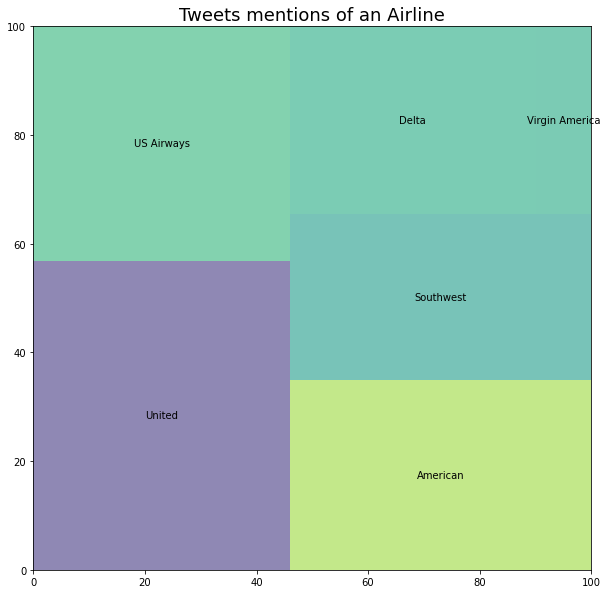

In [158]:
import squarify
labels = ['United','US Airways','American','Southwest','Delta','Virgin America']
sizes = [0.261, 0.198, 0.188, 0.165, 0.152, 0.0344]
plt.subplots(figsize=(10,10))
squarify.plot(sizes=sizes, label=labels, alpha=0.6)
plt.title('Tweets mentions of an Airline', fontsize=18)

In [159]:
label = ['positive','negative','neutral']
final_df['sentiment'].value_counts()


neutral     5528
positive    5459
negative    3653
Name: sentiment, dtype: int64

Text(0, 0.5, 'Mood')

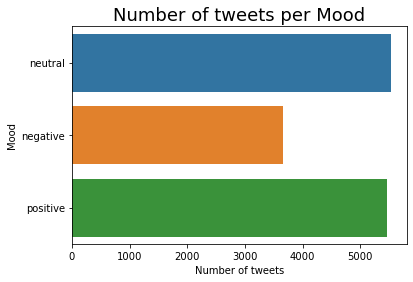

In [160]:
sns.countplot(y='sentiment', data=final_df)
plt.title('Number of tweets per Mood', fontsize=18)
plt.xlabel('Number of tweets')
plt.ylabel('Mood')

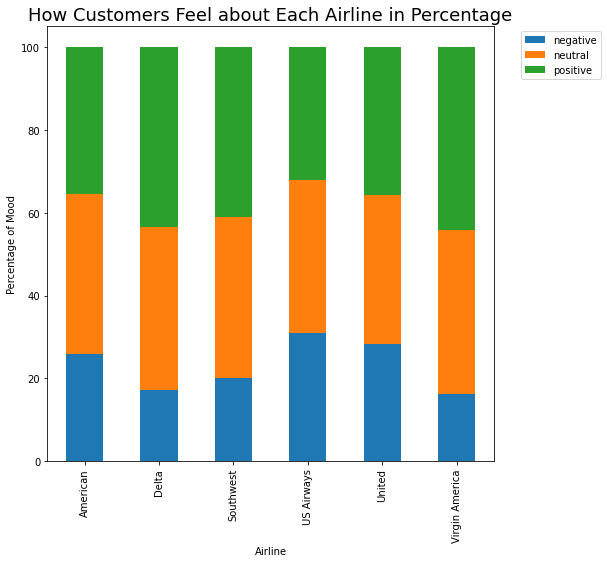

In [161]:
cross1 = pd.crosstab(final_df.airline, final_df.sentiment).apply(lambda x: x / x.sum() * 100, axis=1).plot(kind='bar',title='How Customers Feel about Each Airline in Percentage',figsize=(8,8),stacked=True)
cross1.title.set_size(18)
cross1.set_xlabel('Airline')
cross1.set_ylabel('Percentage of Mood')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

In [162]:
pd.crosstab(final_df.airline, final_df.sentiment)

sentiment,negative,neutral,positive
airline,,,
American,716,1066,977
Delta,381,878,963
Southwest,489,937,994
US Airways,902,1073,938
United,1083,1374,1365
Virgin America,82,200,222


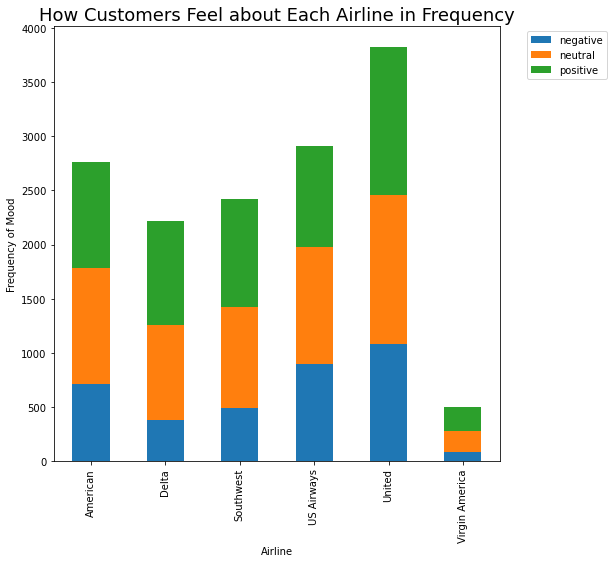

In [163]:
cross2 = pd.crosstab(final_df.airline, final_df.sentiment).plot(kind="bar",title='How Customers Feel about Each Airline in Frequency',figsize=(8,8),stacked=True)
cross2.title.set_size(18)
cross2.set_xlabel('Airline')
cross2.set_ylabel('Frequency of Mood')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

# Wordclouds

## Negative Words

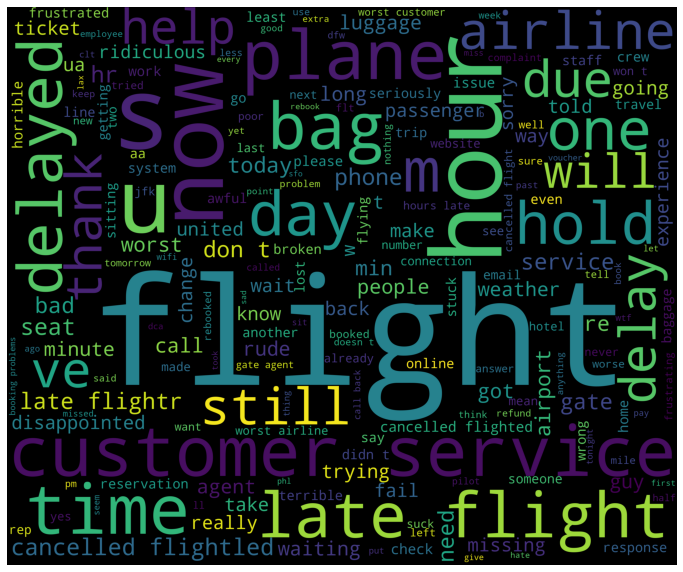

In [86]:
df_negative = final_df[final_df['sentiment']=='negative']
words = ' '.join(df_negative['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)


plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## Positive

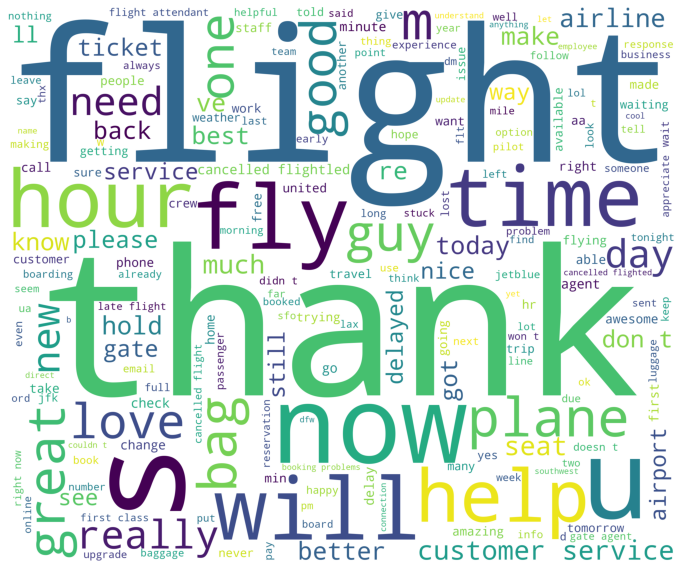

In [133]:
df_postive = final_df [final_df['sentiment']=='positive']
words = ' '.join(df_postive['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)


plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## Neutral

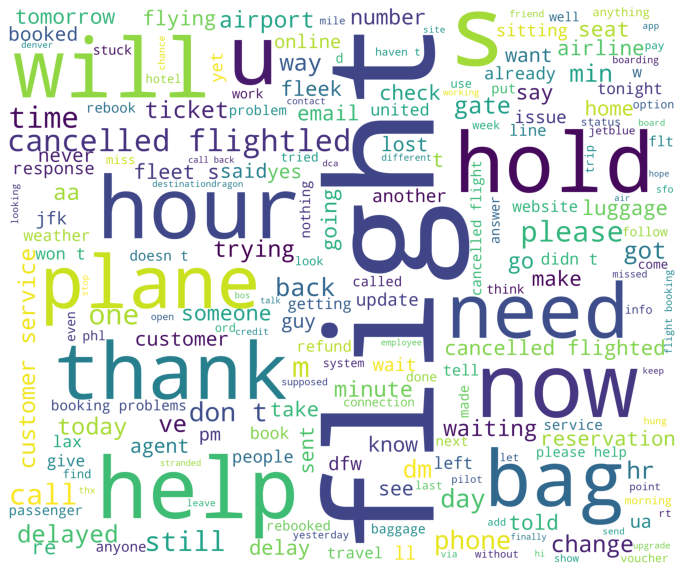

In [135]:
df_neutral = final_df[final_df['sentiment']=='neutral']
words = ' '.join(df_neutral['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()